# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цель исследования:**
1. Определить рыночную стоимость объектов недвижимости;
2. Построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность;
3. Установить, какие факторы влияют на ценообразование стоимости квартир.

    **Ход исследования**

    Данные о недвижимости получу из файла '/datasets/real_estate_data.csv'. О качестве данных ничего неизвестно, поэтому перед тем, как приступать к целям исследования, понадобится обзор данных.

    Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее, создам необходимые столбцы и приступлю к проведению исследовательского анализа.

    Таким образом, моё исследование пройдёт в семь этапов:
    
    * Обзор данных;
    * Предобработка данных;
    * Расчеты и добавление результатов в таблицу;
    * Проведение анализа для Ленинградской области;
    * Проведение анализа для Санкт-Петербурга;
    * Поиск различий в факторах, которые определяют ценообразование стоимости квартир;
    * Написание общего вывода.
    

## Открытие файла и изучение общей информации.

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Открытие данных и разделение колонок, столбцов
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [3]:
# Вывод методом display() первых пяти строк методом head()
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
# Вывод информации обо всей таблице методом info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Исходя из полученной информации, можно сделать вывод о том, что:
    
* проблема с названием только одного столбца - `cityCenters_nearest` (прописная буква);
* много пропусков в разных столбцах;
* несоответствие типов данных, например, количество балконов это целое число.


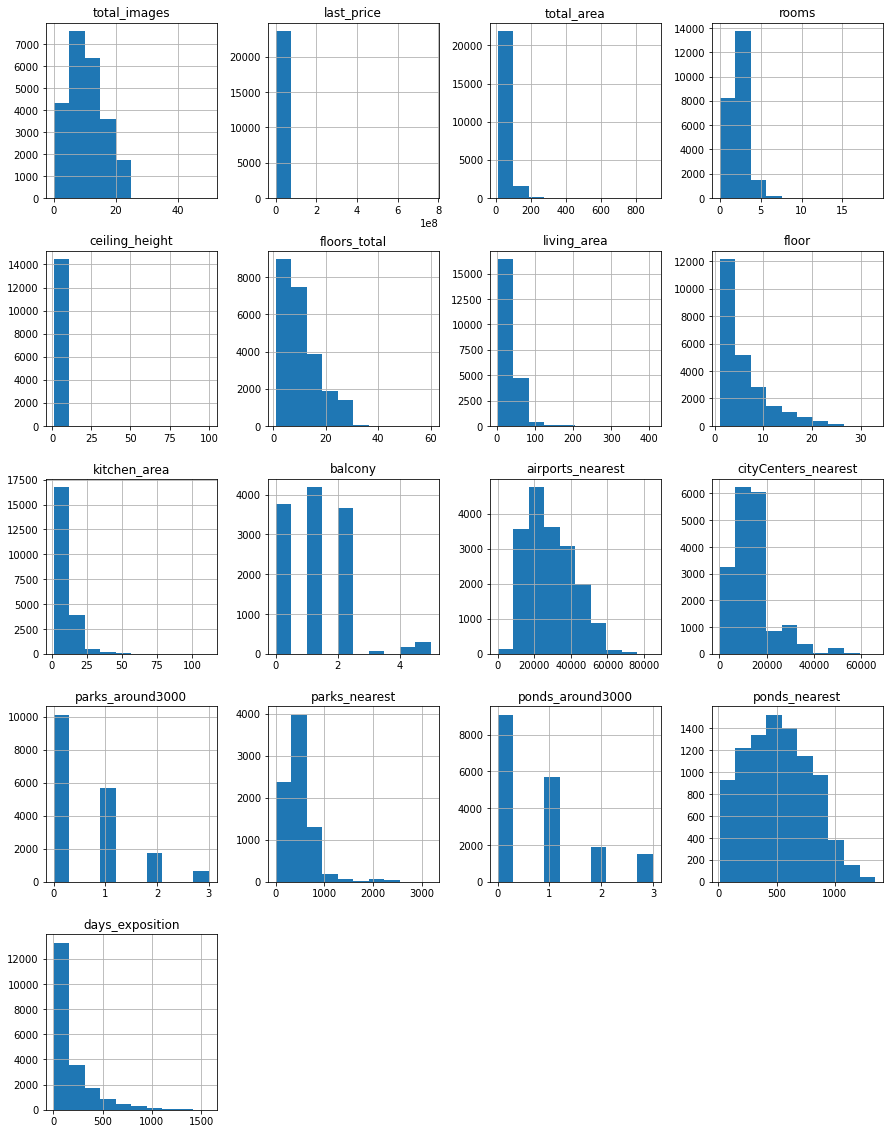

In [5]:
# Построение гистограмм методом hist, параметром figsize задаю размеры графиков
data.hist(figsize=(15, 20))
plt.show()

По этим гистограммам видно:
    
* большое количество выбросов и аномальных значений (например, столбцы `total_area`,`last_price`)

## Предобработка данных

### Нахождение и изучение пропущенных значений в столбцах.

In [6]:
#Вывод пропущенных значений для каждого столбца датафрейма. Методом isna() они находятся, а методом sum() подсчитываются
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Во многих столбцах датафрейма оказались пропущенные значения. Больше всех от этого пострадали столбцы: с информацией о статусе объекта недвижимости `is_apartment` (20924 пропусков), `parks_nearest` (15620 пропусков) и  `ponds_nearest` (14589 пропусков).
    
Как известно из описания проекта, пропуски оказались в данных, вписанных пользователями (человеческий фактор) и полученные автоматически на основе картографических данных (технический сбой, ошибка в скрипте и т.д.)

In [7]:
#заполнение пропусков в столбцах нулевыми значениями методом fillna() для нахождения NaN значений
data['balcony'] = data['balcony'].fillna(0)

В столбце с количеством балконов пропуски были заполнены нулевыми значениями, предполагая их отсутствие в квартирах.

In [8]:
# заполнение пропусков в булевой переменной значениями False
data['is_apartment'] = data['is_apartment'].fillna(False)

# замена символа в названии столбца `cityCenters_nearest`
data.columns = data.columns.str.replace('cityCenters_nearest', 'citycenters_nearest')

В столбце `is_apartment` пропуски были заполнены значениями False, так как они составляют большую часть датасета.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [10]:
# проверка оставшихся пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
citycenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Возможными причинами пропуска данных являются: 
* Человеческий фактор
* Технические проблемы 
* Повреждение файла с данными
* Пропуски/ошибки в картографических данных

### Рассмотрение типов данных в столбцах.

In [11]:
# вывод типа данных всех строк датафрейма
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
citycenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Практически все столбцы имеют корректный тип данных.
    
`first_day_exposition` для дальнейших манипуляций лучше перевести в формат `datetime`

In [12]:
# методом to_datetime превращаю содержимое столбца в особый тип данных datetime для проведения дальнейших арифметических операций
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [13]:
# вывожу все типы данных повторно для проверки и первые 10 строк датафрейма, чтобы проверить корректность значений
print(data.dtypes)
display(data.head(10))

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
citycenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


В результате преобразований типов данных получился датафрейм с корректными типами данных.

Изменить тип значений необходимо для удобства расчётов и дополнительной проверки столбцов на пропуски и неподходящие значения.

### Устранение неявных дубликатов в столбце с названиями.

In [14]:
# подсчёт количества уникальных значений комбинацией методов unique() и len()
print('Количество уникальных значений до обработки:', len(data['locality_name'].unique()))

# вывод списка всех уникальных значений с названиями населённых пунктов
display(data['locality_name'].unique())

Количество уникальных значений до обработки: 365


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [15]:
# замена с помощью метода replace() символа 'ё' на 'е' и видов населённых пунктов на пропуск для устранения неявных дубликатов
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа ', 'деревня ', 'село ', 'городского типа ', 'городской ', 'при железнодорожной станции ', 'имени ', 'коттеджный ', 'садовое товарищество ', 'станции ', 'поселок ', 'садоводческое некоммерческое товарищество '], '', regex=True)
) 

In [16]:
print('Количество уникальных значений после обработки:', len(data['locality_name'].unique()))

# вывод списка всех уникальных значений с названиями населённых пунктов
display(data['locality_name'].unique())

Количество уникальных значений после обработки: 306


array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

После замены символов и видов населённых пунктов было удалено 59 уникальных значений, являющихся неявными дубликатами названия населённых пунктов.

In [17]:
# проверка явных дубликатов с помощью метода duplicated() и их подсчет с помощью метода sum()
data.duplicated().sum()

0

В ходе работы были проверены и обработаны неявные дубликатов названий насёленных пунктов в столбце `locality_name`.
Явные дубликаты в датафрейме отсутствуют.

### Добавление новых столбцов

In [18]:
# расчёт цены за кв. м делением значений из столбца 'last_price' на значения из столбца 'total_area' и округлением до сотых методов round() c параметром 2
data['price_one_square_meter'] = round(data['last_price'] / data['total_area'], 2)

In [19]:
#определение дня недели публикации
data['day_week_publication'] = data['first_day_exposition'].dt.weekday

#определение месяца публикации
data['month_publication'] = data['first_day_exposition'].dt.month

#определение года публикации
data['year_publication'] = data['first_day_exposition'].dt.year

In [20]:
"""
Функция принимает 2 аргумента из датафрейма (этаж и всего этажей в доме) и 
возвращает тип этажа в зависимости от значения аргументов:
- если этаж 1 то 'первый'
- если этаж = всего этажей то 'последний'
- во всех остальных случаях - 'другой'
- в случае ошибки возращается 'Нет типа'
"""
def categorize_floor(floor, total_floor):
    try:
        if floor == 1:
            return 'первый'
        elif floor == total_floor:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'нет типа'
    
#определение типа этажа квартиры с помощью метода apply() и функции categorize_floor построчно
data['floor_type'] = data.apply(lambda row: categorize_floor (row['floor'], row['floors_total']), axis=1)

# проверка функции выводом уникальных значений методом unique()
data['floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

После проверки видно, что всем значениям столбца `floor` был определён тип этажа, так как отсутствует вариант 'нет типа'.

In [21]:
# определение расстояния до центра в км, переведя метры в километры 
# делением на 1000, округляя до целых и переводя в целый числовой тип
data['distance_center'] = round(data['citycenters_nearest'] / 1000)

# вывод первых 5 строк датафрейма для проверки добавленных столбцов
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,day_week_publication,month_publication,year_publication,floor_type,distance_center
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


Было добавлено 6 новых столбцов, расчитанных на основании уже существующих данных, в качестве параметров для дальнейшего анализа и оценки.

## Исследовательский анализ данных

### Изучение параметров и построение гистограмм для каждого из этих параметров.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


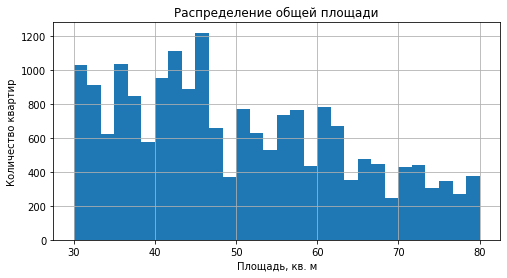

In [22]:
# Изучение общей площади с помощью метода describe(), который описывает значения диаграммы размаха
print(data['total_area'].describe())

# В результате получается распределение на гистограмме
data.hist('total_area', bins=30, figsize=(8,4), range=(30, 80))
plt.title('Распределение общей площади')
plt.ylabel('Количество квартир')
plt.xlabel('Площадь, кв. м')
plt.show()

По данной гистограмме видно, что типичной общей площадью для квартир является 45 кв. м. И чем больше эта площадь, тем реже такие квартиры встречаются в объявлениях на Яндекс Недвижимости.

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


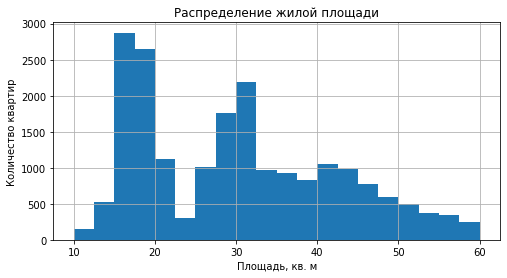

In [23]:
# Изучение жилой площади
print(data['living_area'].describe())

# В результате получается наглядное распределение
data.hist('living_area', bins=20, figsize=(8,4), range=(10, 60))
plt.title('Распределение жилой площади')
plt.ylabel('Количество квартир')
plt.xlabel('Площадь, кв. м')
plt.show()

Из этого графика наблюдается странный провал количества квартир с жилой площадью в 25 кв. м. Возможно это произошло из-за удаления части значений с пропусками.
    
Типичными значениями жилой площади стали 17.5 и 27.5 кв. м.

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


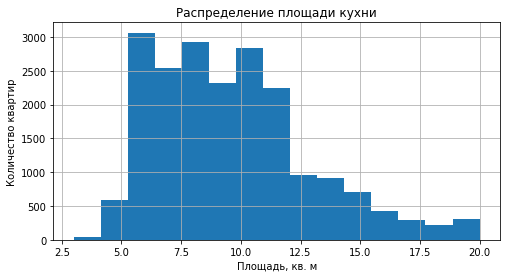

In [24]:
# Изучение площади кухни
print(data['kitchen_area'].describe())

# В результате получается наглядное распределение
data.hist('kitchen_area', bins=15, figsize=(8,4), range=(3, 20))
plt.title('Распределение площади кухни')
plt.ylabel('Количество квартир')
plt.xlabel('Площадь, кв. м')
plt.show()

По гистрограмме видно, что большая часть квартир имеет площадь кухни от 5 до 12 кв. м.
    
Самой типичной площадью обладают кухни с 6 кв. м.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


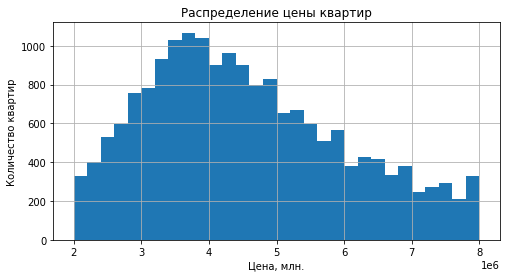

In [25]:
# Изучение цены
print(data['last_price'].describe())

# В результате получается наглядное распределение
data.hist('last_price', bins=30, figsize=(8,4), range=(2e+06, 8e+06))
plt.title('Распределение цены квартир')
plt.ylabel('Количество квартир')
plt.xlabel('Цена, млн.')
plt.show()

На основании полученных данных, можно сделать вывод, что чаще всего квартиры стоили от 3.5 млн до 4 млн.

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


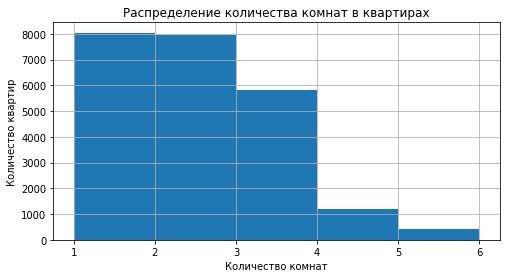

In [26]:
# Изучение количества комнат
print(data['rooms'].describe())

# В этом разбросе проблем не замечено
data.hist('rooms', bins=5, figsize=(8,4), grid = True, range=(1, 6))
plt.title('Распределение количества комнат в квартирах')
plt.ylabel('Количество квартир')
plt.xlabel('Количество комнат')
plt.show()

Больше всего в данном наборе данных оказалось однокомнатных квартир. Прослеживается, что чем больше комнат, тем меньше шансов найти такую квартиру в объявлениях.

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


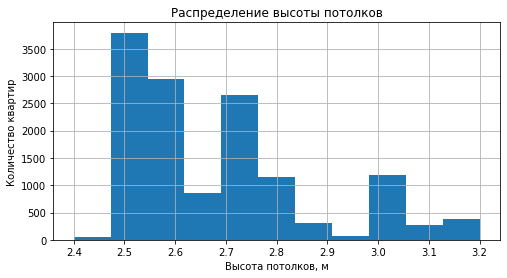

In [27]:
# Изучение высоты потолков
print(data['ceiling_height'].describe())
# Предположим, что значения больше 19, это аномальные значения, восстановим их делением на 10 с помощью логической индексации loc.
data.loc[data['ceiling_height']>19, ['ceiling_height']] = data.loc[data['ceiling_height']>19, ['ceiling_height']]/10

# В результате получается наглядное распределение
data.hist('ceiling_height', bins=11, figsize=(8,4), range=(2.4, 3.2))
plt.title('Распределение высоты потолков')
plt.ylabel('Количество квартир')
plt.xlabel('Высота потолков, м')
plt.show()

Типичной высотой для квартир Санкт-Петербурга является 2.5 метра.

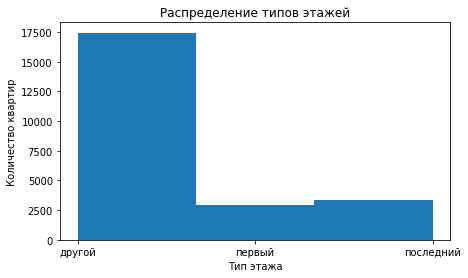

In [28]:
# Изучение типа этажей квартир
plt.figure(figsize = (7, 4))
plt.title('floor_type')
plt.hist(data['floor_type'], bins = 3)
plt.title('Распределение типов этажей')
plt.ylabel('Количество квартир')
plt.xlabel('Тип этажа')
plt.show()

По типу этажей квартир замечена интересная особенность - количество квартир на первых и последних этажах приблизительно равно, как-будто в выборке оказались квартиры из одних и тех же домов в равных пропорциях.
    
Закономерно, самым частым типом этажей стал "другой".

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


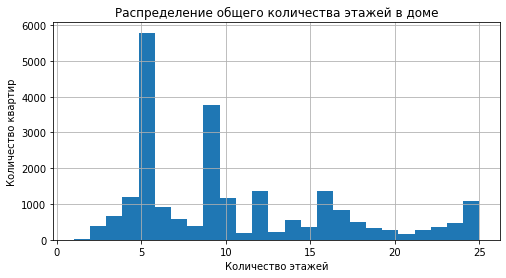

In [29]:
# Изучение общего количества этажей в доме
print(data['floors_total'].describe())

# В результате получается наглядное распределение
data.hist('floors_total', bins=25, figsize=(8,4), range=(1, 25))
plt.title('Распределение общего количества этажей в доме')
plt.ylabel('Количество квартир')
plt.xlabel('Количество этажей')
plt.show()

По количеству этажей в доме так же была проведена фильтрация нулевых значений и выбросов. По гистограмме заметно, что больше всего в Санкт-Петербурге строили пятиэтажные и девятиэтажные дома, предпочитая нечетные значения. Но начиная с 10 этажей, в приоритете у строителей четное число этажей в доме - 16, 24.

count    18180.000000
mean        14.184818
std          8.616194
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: distance_center, dtype: float64


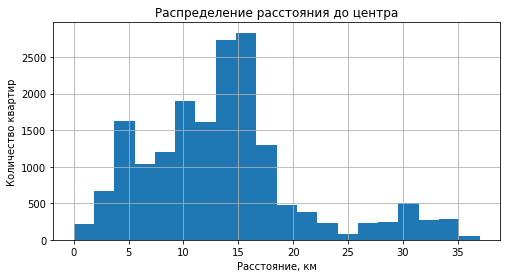

In [30]:
# Изучаем расстояние до центра
print(data['distance_center'].describe())

data.hist('distance_center', bins=20, figsize=(8,4), range=(0, 37))
plt.title('Распределение расстояния до центра')
plt.ylabel('Количество квартир')
plt.xlabel('Расстояние, км')
plt.show()

Расстояние до центра города было добавлено в датафрейм на основании столбца 'cityсenters_nearest' и отфильтровано от аномальных нулевых значений. Больше всего квартир расположено на удалении 13-16 км от центра.

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


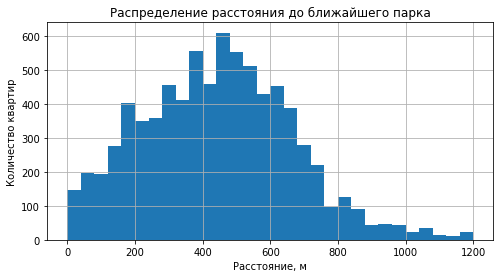

In [31]:
# Изучим расстояние до ближайшего парка
print(data['parks_nearest'].describe())

data.hist('parks_nearest', bins=30, figsize=(8,4), range=(0, 1200))
plt.title('Распределение расстояния до ближайшего парка')
plt.ylabel('Количество квартир')
plt.xlabel('Расстояние, м')
plt.show()

Расстояние до ближайшего парка похоже на распределение Пуассона, по которому видно, что самое частое расположение парков у квартир - 500 метров.

In [32]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,day_week_publication,month_publication,year_publication,distance_center
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,...,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,18180.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.729608,10.673824,34.457852,5.892358,10.569807,0.591080,...,0.611408,490.804555,0.770255,517.980900,180.888634,9.942166e+04,2.569307,6.400101,2017.367146,14.184818
std,5.682529,1.088701e+07,35.654083,1.078405,0.319850,6.597173,22.030445,4.885249,5.905438,0.959298,...,0.802074,342.317995,0.938346,277.720643,219.727988,5.030680e+04,1.789082,3.491561,1.039771,8.616194
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,1.118300e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,...,0.000000,288.000000,0.000000,294.000000,45.000000,7.658547e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,...,0.000000,455.000000,1.000000,502.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,...,1.000000,612.000000,1.000000,729.000000,232.000000,1.142563e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,7.630000e+08,900.000000,19.000000,14.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


### Изучение скорости продажи квартир.

In [33]:
# Изучение скорости продажи квартир
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Из значений диаграммы размаха видно, что обычно квартиры продаются за 3 месяца (92 дня), но не редки продажи в первые недели публикации объявлений. В целом можно сделать вывод, что большая часть квартир, опубликованных в сервисе Яндекс Недвижимость, покупаются за первые полгода.

Значит быстрой можно считать продажу, которая произошла за 44 дня (Квартиль 1). А необычно долгими: объявления,которые были размещены больше полугода - 223 дня(Квартиль 3).

### Определение факторов, больше всего влияющих на стоимость объекта.

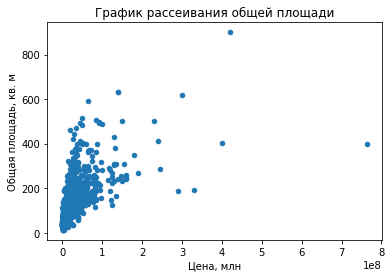

Коэффициент корреляции Пирсона: 0.65


In [34]:
# График рассеивания общей площади
data.plot(x='last_price', y='total_area', kind='scatter')
plt.title('График рассеивания общей площади')
plt.ylabel('Общая площадь, кв. м')
plt.xlabel('Цена, млн')
plt.show()

print('Коэффициент корреляции Пирсона:', round(data['last_price'].corr(data['total_area']), 2))

Видна уверенная положительная корреляция цены квартиры и общей площади, т.е. чем больше площадь, тем выше цена.
    
На графика четко видны аномальные значения, они обозначены отдельными точками в левом верхнем углу. Возможно, это объявления мошенников.

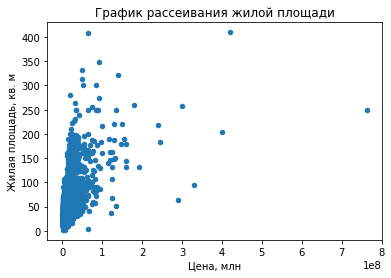

Коэффициент корреляции Пирсона: 0.57


In [35]:
# График рассевания жилой площади
data.plot(x='last_price', y='living_area', kind='scatter')
plt.title('График рассеивания жилой площади')
plt.ylabel('Жилая площадь, кв. м')
plt.xlabel('Цена, млн')
plt.show()

print('Коэффициент корреляции Пирсона:', round(data['last_price'].corr(data['living_area']), 2))

Здесь положительная кореляция уже слабее, но всё равно прослеживается увеличение цены при увеличении жилой площади.
    
И так же наблюдаются аномальные значения отдельными точками на графике - выглядит подозрительно.

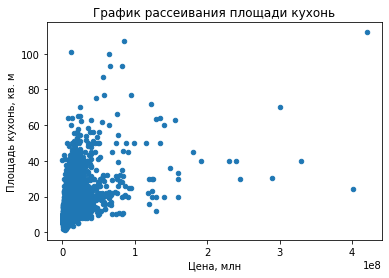

Коэффициент корреляции Пирсона: 0.52


In [36]:
# График рассевания площади кухни
data.plot(x='last_price', y='kitchen_area', kind='scatter')
plt.title('График рассеивания площади кухонь')
plt.ylabel('Площадь кухонь, кв. м')
plt.xlabel('Цена, млн')
plt.show()

print('Коэффициент корреляции Пирсона:', round(data['last_price'].corr(data['kitchen_area']), 2))

Здесь положительная кореляция ещё слабее, закономерность прослеживается меньше, чем у предыдущих параметров.
    
И так же наблюдаются аномальные значения отдельными точками на графике.

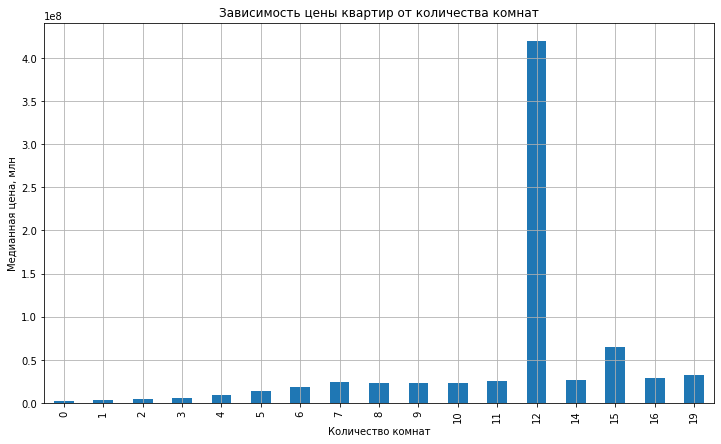

In [37]:
# Группировка данных для построения графика
rooms_bar = data.groupby('rooms')['last_price'].median()

rooms_bar.plot.bar(x='last_price', y='rooms', grid=True, figsize=(12,7), title = 'Зависимость цены квартир от количества комнат',xlabel='Количество комнат', ylabel = 'Медианная цена, млн')
plt.show()

На графике видна четкая взаимосвязь данных - чем больше комнат, тем выше цена квартир. На значении 12 комнат замечен сильный выброс.

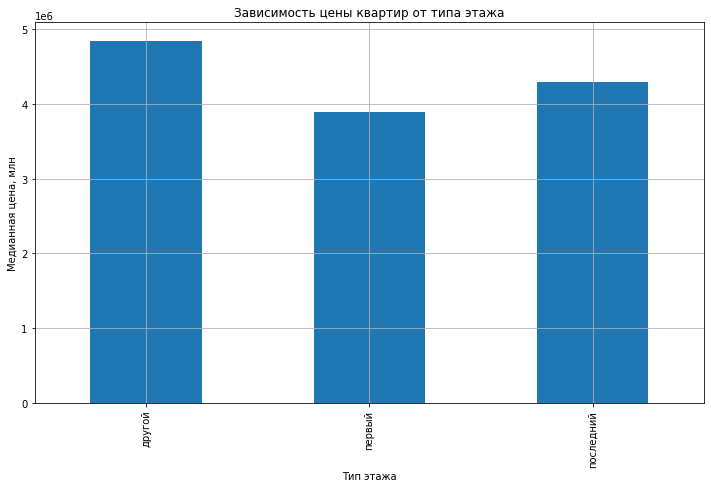

In [38]:
# Группировка данных для построения графика
floor_bar = data.groupby('floor_type')['last_price'].median()

floor_bar.plot.bar(x='last_price', y='floor_type', grid=True, figsize=(12,7), title = 'Зависимость цены квартир от типа этажа', xlabel='Тип этажа', ylabel = 'Медианная цена, млн')
plt.show()

Квартиры находящиеся на первых этажах имеют наименьшую цену.

Дальше по стоимости идут последние этажи.

Самыми дорогими являются квартиры на других этажах.

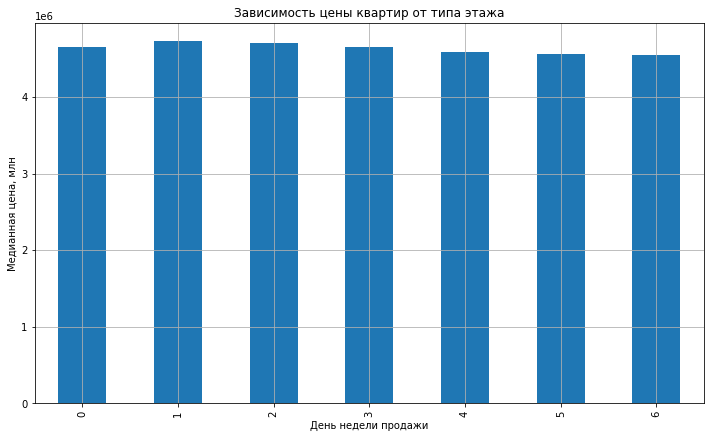

In [39]:
# Группировка данных для построения графика
day_bar = data.groupby('day_week_publication')['last_price'].median()

day_bar.plot.bar(x='last_price', y='day_week_publication', grid=True, figsize=(12,7), title = 'Зависимость цены квартир от типа этажа', xlabel='День недели продажи', ylabel = 'Медианная цена, млн')
plt.show()

День публикации объявления никак не влияет на стоимость продажи квартиры.

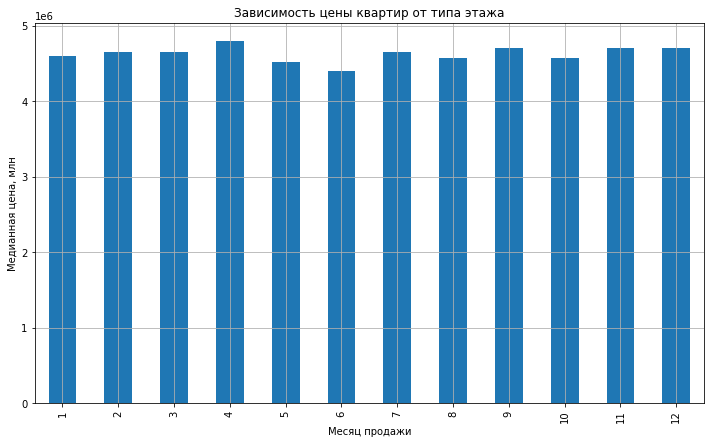

In [40]:
# Группировка данных для построения графика
mounth_bar = data.groupby('month_publication')['last_price'].median()

mounth_bar.plot.bar(x='last_price', y='month_publication', grid=True, figsize=(12,7), title = 'Зависимость цены квартир от типа этажа', xlabel='Месяц продажи', ylabel = 'Медианная цена, млн')
plt.show()

Прослеживается небольшая связь месяца продажи и цены квартиры: дороже всего квартиры в декабре - видимо, связано с завершением года и подсчётом бюджетов.

Дешевле всего квартиры стоят в марте.

Но в целом взаимосвязь достаточно слабая и находится на уровне погрешности.

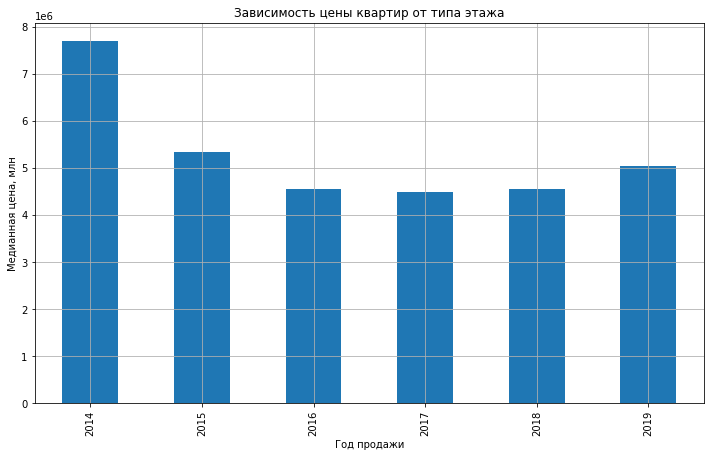

In [41]:
# Группировка данных для построения графика
year_bar = data.groupby('year_publication')['last_price'].median()

year_bar.plot.bar(x='last_price', y='year_publication', grid=True, figsize=(12,7), title = 'Зависимость цены квартир от типа этажа', xlabel='Год продажи', ylabel = 'Медианная цена, млн')
plt.show()

Видно планомерное падение цен на недвижимость в Санкт-Петербурге с 2014 года по 2017 год, связанная, скорее всего, с кризисом 2014 года и дальнейший медленный рост.

Как видно из графиков и расчётов - больше всего на цену недвижимости влияет общая площадь квартиры. Выраженная положительная корреляция, свидетельствующая о росте цены при увеличении площади.
    
Вторым по значимости параметром стала жилая площадь - чем она больше, тем выше цена недвижимости.
    
На третьем месте по коэффициенту Пирсона оказалась площадь кухни - чем больше площадь кухни, тем больше цена квартиры.
    
Количество комнат так же оказывает сильное влияние на стоимость квартиры, которое можно увидеть на представленной столбчатой диаграмме.
    
Первые и последние этажи по объективным причинам немного уменьшают цену квартир.
    
Год продажи тоже сыграл свою роль - из-за кризиса 2014 года цены на жильё начали падать и продолжали снижаться до 2017 года.

### Расчёт средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [42]:
# Определение средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

# группировка данных по столбцу locality_name методом groupby() с сортировкой по количеству 
# объявлений методом count() по убыванию методом sort_values и параметром ascending = False

print(data.groupby('locality_name')['price_one_square_meter'].count().sort_values(ascending = False).head(11))

locality_name
Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Петергоф             201
Name: price_one_square_meter, dtype: int64


In [43]:
# Создание сводой таблицы методом pivot_table, группируя данные по названию населённых пунктов
# и применяя к столбцу с ценой за кв. м. метод mean(), чтобы посчитать среднее значение и 
# count() чтобы посчитать количество объявлений по населённым пунктам
mean_price_square_m = data.pivot_table(index='locality_name', values='price_one_square_meter', aggfunc=['mean', 'count'])

# Переименование столбцов с помощью columns для удобства дальнейших действий
mean_price_square_m.columns = ['mean_price_square_meter', 'count']

# Отфильтровывание населённых пунктов, которые не вошли в 10 по количеству объявлений
mean_price_square_m = mean_price_square_m[mean_price_square_m['count'] > 197]

# вывод получившейся сводной таблицы сортировкой по средней цене за кв. м. по убыванию
print(mean_price_square_m.sort_values(by='mean_price_square_meter', ascending = False))

                 mean_price_square_meter  count
locality_name                                  
Санкт-Петербург            114849.008793  15721
Пушкин                     103125.819377    369
Кудрово                     95324.930508    472
Парголово                   90175.913089    327
Мурино                      86087.512017    590
Петергоф                    84757.559602    201
Шушары                      78677.364318    440
Колпино                     75424.579112    338
Гатчина                     68746.146515    307
Всеволожск                  68654.473970    398
Выборг                      58141.909325    237


   Как и следовало ожидать, больше всех средняя цена за квадратный метр в Санкт-Петербурге (110737), тогда как самая низкая средняя стоимость за квадратный метр оказалась в Выборге(58225).

### Исследование зависимости средней стоимости квадратного метра от расстояния до центра города.

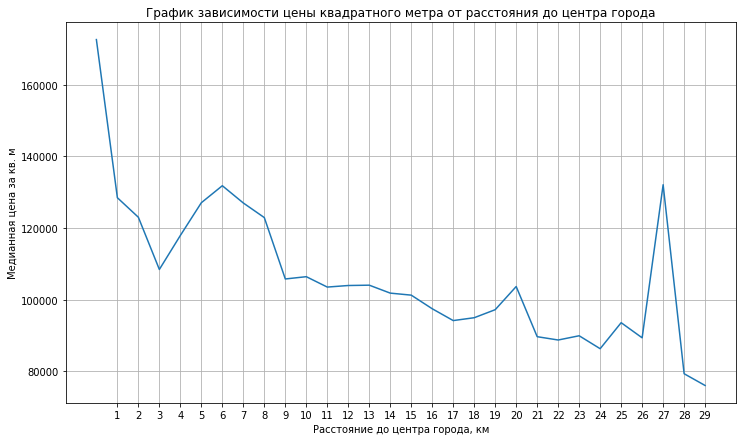

Коэффициент корреляции Пирсона: -0.31


In [44]:
# Определение средней цены за кв. м в зависимости от расстояния до центра (только в Санкт-Петербурге)

# Создаю дф с отфильтрованными значениями из основного дф
distance_to_sp = data[data['locality_name'] == 'Санкт-Петербург']

# Группирую по расстоянию от центра и рассчитываю среднюю цену кв. м.
distance_to_sp_grp = distance_to_sp.groupby('distance_center')['price_one_square_meter'].median()

# Строю график зависимости средней цены за кв. м от расстояния до центра
distance_to_sp_grp.plot(x='distance_center', y='price_one_square_meter', grid=True, figsize=(12,7), title = 'График зависимости цены квадратного метра от расстояния до центра города', xlabel='Расстояние до центра города, км', ylabel='Медианная цена за кв. м')
# Ограничиваю ось с расстоянием до центра для наглядности и удобства работы с графиком
plt.xticks(ticks=range(1, 30))
plt.show()

print('Коэффициент корреляции Пирсона:', round(distance_to_sp['distance_center'].corr(distance_to_sp['price_one_square_meter']), 2))

На основании графика прослеживается снижение цены за кв.м при удалении от цента города. Однако есть выброс в районе 27 км от центра.

## Общий вывод

<h4> Предобработка данных:  <a class="tocSkip"></h4>

* В ходе предобработки данных было обнаружено большое количество пропусков в столбцах, содержащих разнородную информацию. Возможными причинами явлются: человеческий фактор, технические проблемы и повреждение файла с данными. Хуже всех дела обстояли со столбцами, в которых хранится информация о том, аппартаменты ли это или нет (20924 пропуска) и столбцы с расстояниями до ближайших парков и водоёмов (15620 и 14589 пропуска соответственно. Часть пропусков была заполненна нулями (количество балконов). Часть пропусков была удалена, так как восстановить их не представляется возможным. Остальные пропуски были оставлены без изменений.
* Затем были переведены некоторые типы данных в соответствующие их сущности (целым значениям - int, логическим - bool) и дата была переведена в формат datetime для дальнейшего анализа.
* Устранены неявные дубликаты в названиях населённых пунктов и проведена проверка на явные дубликаты.
* Добавлено 6 новых столбцов, в которых расчитывалась цена одного квадратного метра, расстояние до центра города, определялся тип этажа квартиры и разделялись значения года, месяца и дня публикации объявлений.
    
<h4> Результаты проекта:  <a class="tocSkip"></h4>

1. Большое всего на цену недвижимости влияет общая площадь квартиры. Чем больше площадь, тем выше цена. Далее по убыванию влияния идут: жилая площадь, количество комнат и площадь кухни, так же выражена положительная корреляция (чем ольше значение параметра, тем выше цена квартриры).
2. Больше всего объявлений о продаже квартир, находящихся непосредственно в Санкт-Петербурге, и эти же квартиры имеют наибольшую среднюю цену за квадратный метр. Меньше всего публикуется объявлений о продаже квартир из Кронштадта. Однако самая низкая средняя цена за квадратный метр среди 10 самых популярных населённых пунктов является Красное Село.
3. Ещё одним параметром, сильно влияющем на цену объектов, является удаление от центра города - отрицательная корреляция (чем больше расстояние, тем ниже цена).
    
<h4> Рекомендации  <a class="tocSkip"></h4>

Самыми дорогими являются квартиры в центре Санкт-Петербурга, имеющие большую общую площадь и площадь кухни, большое количество комнат ограничивает минимально возможную цену.
    
Дешевле остальных являются однокомнатные квартиры с маленькой общей площадью и площадью кухни, расположенные на первом или последнем этажах и находящиеся на большом отдалении от центра города.
    
Для более объективной оценки цены квартир в объявлениях необходимо учитывать такие параметры как:
1. Общая площадь;
2. Жилая площадь;
3. Количество комнат;
4. Площадь кухни;
5. Расстояние до центра.